In [3]:
class LinearRegressionSGD(object):
    def __init__(self, eta=0.1, n_iter=50, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
#         self.w = np.ones(X.shape[1])
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#         for _ in range(self.n_iter):
#             if self.shuffle:
#                 X, y = self._shuffle(X, y)
#             # Your code here

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            for x, target in zip(X, y):
                output = x.dot(self.w)
                error = target - output
                self.w += self.eta * error * x
                
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]    
    
    def predict(self, X):
        return np.insert(X, 0, 1, axis=1).dot(self.w)

    def score(self, X, y):
        return 1 - sum((self.predict(X) - y)**2) / sum((y - np.mean(y))**2)

In [4]:
import numpy as np
X = np.array([[0], [1], [2], [3]])
y = np.array([0, 1, 2, 3])
regr = LinearRegressionSGD().fit(X, y)
print(regr.w)
print(regr.score(X, y))
# print(regr.predict(X_test))

[1.18718006e-18 1.00000000e+00]
1.0


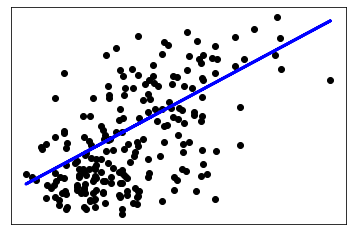

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()
# Use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

regr = LinearRegressionSGD(eta=.1, n_iter=1500)
regr.fit(X_train, y_train)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
X_train

array([[-0.04621589],
       [-1.19357116],
       [-1.21606832],
       [-0.60864494],
       [ 1.48359114],
       [-0.22619319],
       [ 0.35873303],
       [-1.32855413],
       [-1.41854278],
       [-0.87861089],
       [-0.31618184],
       [-0.9910967 ],
       [ 0.493716  ],
       [-0.54115346],
       [ 1.48359114],
       [ 1.61857411],
       [-0.74362792],
       [-0.22619319],
       [-0.49615913],
       [ 1.0336479 ],
       [-1.3510513 ],
       [ 0.0212756 ],
       [ 2.18100317],
       [-0.49615913],
       [-0.8111194 ],
       [ 0.33623587],
       [-0.69863359],
       [-0.42866765],
       [-0.96859954],
       [-0.5186563 ],
       [ 1.16863087],
       [-1.26106265],
       [ 1.23612236],
       [-0.338679  ],
       [-0.65363927],
       [ 1.95603155],
       [-0.76612508],
       [-0.24869035],
       [ 0.40372735],
       [ 0.13376141],
       [ 0.87616776],
       [-1.46353711],
       [-0.45116481],
       [-1.75600022],
       [-1.08108535],
       [ 0